# Practical Data Science Project

# 1. Phase 1: Data & EDA

In [2]:
# Import required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings

# Understanding the data

In [3]:
# Read data from the file
fraud_pay = pd.read_csv("C:/Users/pruth/OneDrive/Desktop/Pace University/Spring 2024 - Semester 3/Practical Data Science/Project/Dataset/Datasets.csv")

In [4]:
# Display first five rows
fraud_pay.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [5]:
# Drop unnamed column from the dataframe
fp=fraud_pay.drop(fraud_pay.columns[0], axis=1)

In [6]:
# Display first five rows data
fp.head(5)

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [7]:
# Check for duplicate rows
duplicate_data = fp[fp.duplicated()]
for i in range(len(duplicate_data)):
    row = duplicate_data.iloc[i]
    if duplicate_data[(duplicate_data != row).all(axis = 1)].any():
        print("Duplicate", i)
else:
    print("No duplicates")

No duplicates


In [8]:
# Check for nullvalues
null_val = fp.isnull().sum()
null_val

step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64

In [9]:
# Check shape of the dataframe
print("No of transactions",fp.shape[0], "\n No of features", fp.shape[1])

No of transactions 10127 
 No of features 16


In [10]:
# Columns names
fp.columns

Index(['step', 'type', 'branch', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'unusuallogin', 'isFlaggedFraud', 'Acct type', 'Date of transaction',
       'Time of day', 'isFraud'],
      dtype='object')

In [11]:
# Missing rows or null values
missing_rows = fp[fp.isnull().any(axis=1)]
missing_rows

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
6,1,PAYMENT,China,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,16,0,NaN,9/1/2018,Night,0.0
9,1,DEBIT,China,5337.77,C712410124,NaN,36382.23,C195600860,41898.00,40348.79,9,0,Current,12/1/2018,Night,0.0
20,1,PAYMENT,India,1373.43,C20804602,13854.00,12480.57,M1344519051,0.00,0.00,2,0,Savings,NaN,Morning,0.0
27,1,PAYMENT,China,8009.09,C1053967012,10968.00,2958.91,M295304806,0.00,0.00,10,0,NaN,25/1/2018,Morning,0.0
30,1,PAYMENT,China,3448.92,C2103763750,0.00,0.00,M335107734,0.00,0.00,18,0,Current,NaN,Night,0.0
48,1,CASH_OUT,India,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,12,0,Current,NaN,Morning,0.0
49,1,PAYMENT,Turquia,2204.04,NaN,586.00,0.00,M490391704,0.00,0.00,14,0,Current,10/1/2018,Morning,0.0
53,1,NaN,Turquia,1614.64,C912966811,41276.00,39661.36,M1792384402,0.00,0.00,2,0,Savings,16/1/2018,Afternoon,0.0
56,1,PAYMENT,Estados Unidos,38.66,C343345308,16174.00,16135.34,M1714688478,0.00,0.00,4,0,Savings,3/1/2018,Night,NaN
64,1,DEBIT,Francia,4874.49,NaN,153.00,0.00,C1971489295,253104.00,0.00,16,0,Current,11/1/2018,Night,0.0


In [12]:
# Drop missing values from the dataframe
missing_value_colums = ['type', 'amount', 'nameOrig', 'oldbalanceOrg','oldbalanceDest', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'Acct type', 'Date of transaction', 'Time of day', 'isFraud']
clean_fd = fp.dropna(subset = missing_value_colums)
clean_fd

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0.0
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0.0
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0.0
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0.0


In [13]:
clean_fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10088 non-null  int64  
 1   type                 10088 non-null  object 
 2   branch               10088 non-null  object 
 3   amount               10088 non-null  float64
 4   nameOrig             10088 non-null  object 
 5   oldbalanceOrg        10088 non-null  float64
 6   newbalanceOrig       10088 non-null  float64
 7   nameDest             10088 non-null  object 
 8   oldbalanceDest       10088 non-null  float64
 9   newbalanceDest       10088 non-null  float64
 10  unusuallogin         10088 non-null  int64  
 11  isFlaggedFraud       10088 non-null  int64  
 12  Acct type            10088 non-null  object 
 13  Date of transaction  10088 non-null  object 
 14  Time of day          10088 non-null  object 
 15  isFraud              10088 non-null 

In [14]:
mapping = {0: 'No', 1: 'Yes'}

clean_fd_modified = clean_fd.copy()
clean_fd_modified['isFraud'] = clean_fd['isFraud'].map(mapping)
clean_fd_modified['isFlaggedFraud'] = clean_fd['isFlaggedFraud'].map(mapping)
clean_fd_modified

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,No,Current,3/1/2018,Morning,No
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,No,Savings,5/1/2018,Morning,No
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,No,Current,7/1/2018,Morning,Yes
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,No,Current,6/1/2018,Afternoon,Yes
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,No,Current,6/1/2018,Morning,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,No,Current,3/1/2018,Afternoon,No
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,No,Savings,5/1/2018,Morning,No
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,No,Savings,7/1/2018,Night,No
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,No,Savings,6/1/2018,Night,No


In [15]:
# Check for fraud count
fraud_count = clean_fd_modified['isFraud'].value_counts()
fraud_count

No     10020
Yes       68
Name: isFraud, dtype: int64

In [16]:
flagged_fraud= clean_fd_modified['isFlaggedFraud'].value_counts()
flagged_fraud

No    10088
Name: isFlaggedFraud, dtype: int64

# Exploratory Data Analysis

# Class imbalance

In this exploratory analysis, we can observe that there is a class imbalance in the dataset. Class imbalance is defined as a percentage of total number of transactions presente in fraud column (isFraued). 
1. Non-Fraudulent = 99.3% (10021) transactions
2. Fraudulent = 0.7% (68) transactions

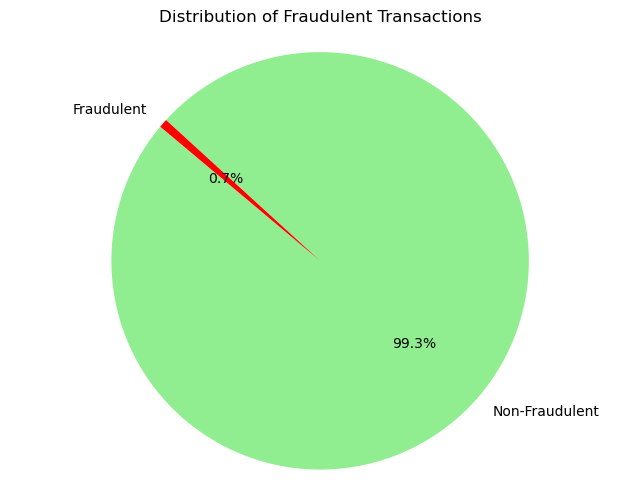

In [17]:
# Count the number of fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))
plt.pie(fraud_count, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['lightgreen', 'red'], startangle=140)
plt.title('Distribution of Fraudulent Transactions')
plt.axis('equal')
plt.show()

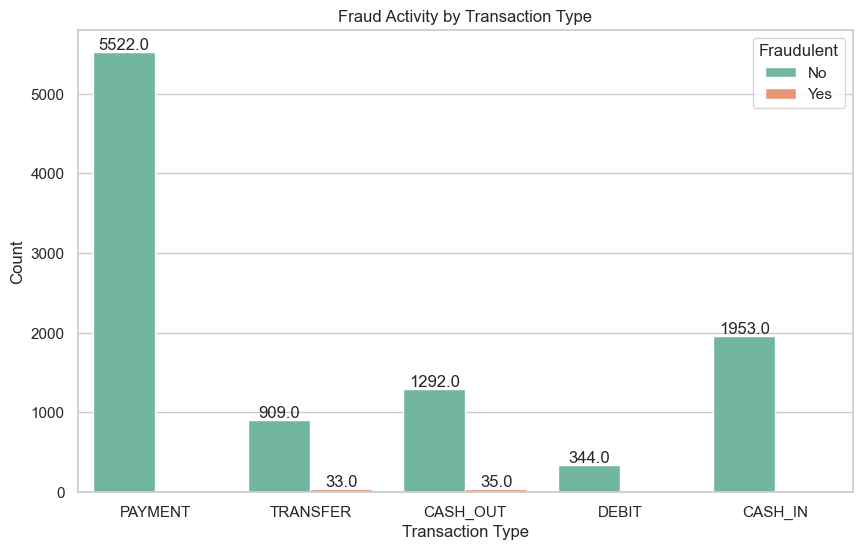

In [18]:
# Plot the graph of fraud activity by transaction type
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', hue='isFraud', data=clean_fd_modified, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Fraud Activity by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraudulent', loc='upper right')
plt.show()

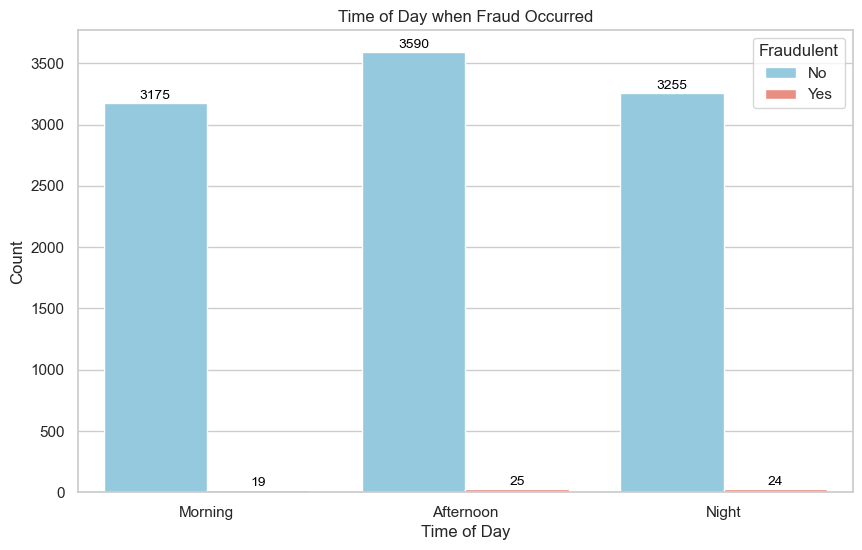

In [19]:
# Plot countplot for time of day when fraud occurred
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of day', hue='isFraud', data=clean_fd_modified, palette={'No': 'skyblue', 'Yes': 'salmon'})
plt.title('Time of Day when Fraud Occurred')
plt.xlabel('Time of Day')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.legend(title='Fraudulent', loc='upper right')
plt.show()

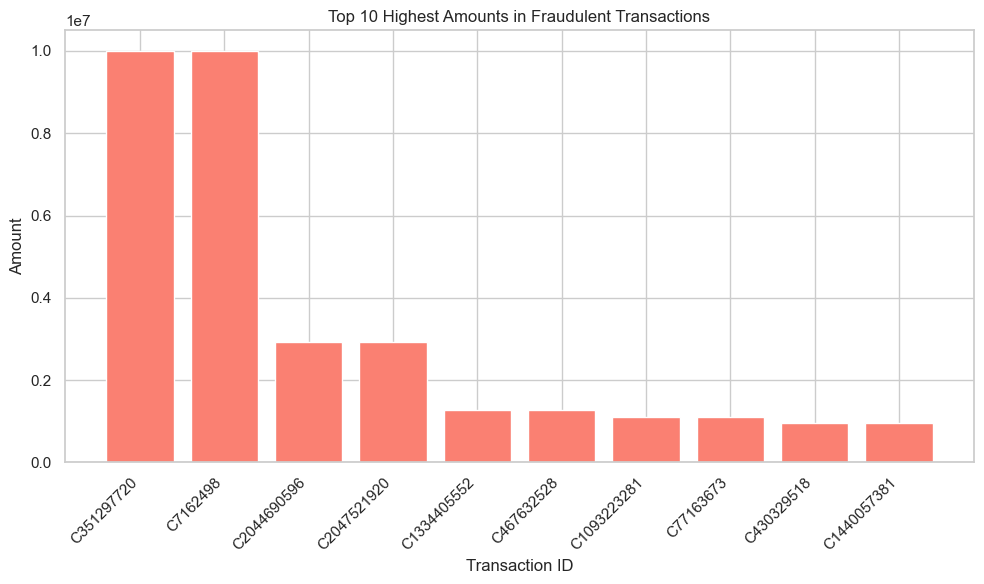

In [20]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes']

# Sort the fraudulent transactions by the amount in descending order and take the top N transactions
top_fraudulent_transactions = fraudulent_transactions.sort_values(by='amount', ascending=False).head(10)

# Plot the highest amounts in fraudulent transactions
plt.figure(figsize=(10, 6))
plt.bar(top_fraudulent_transactions['nameOrig'], top_fraudulent_transactions['amount'], color='salmon')
plt.title('Top 10 Highest Amounts in Fraudulent Transactions')
plt.xlabel('Transaction ID')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

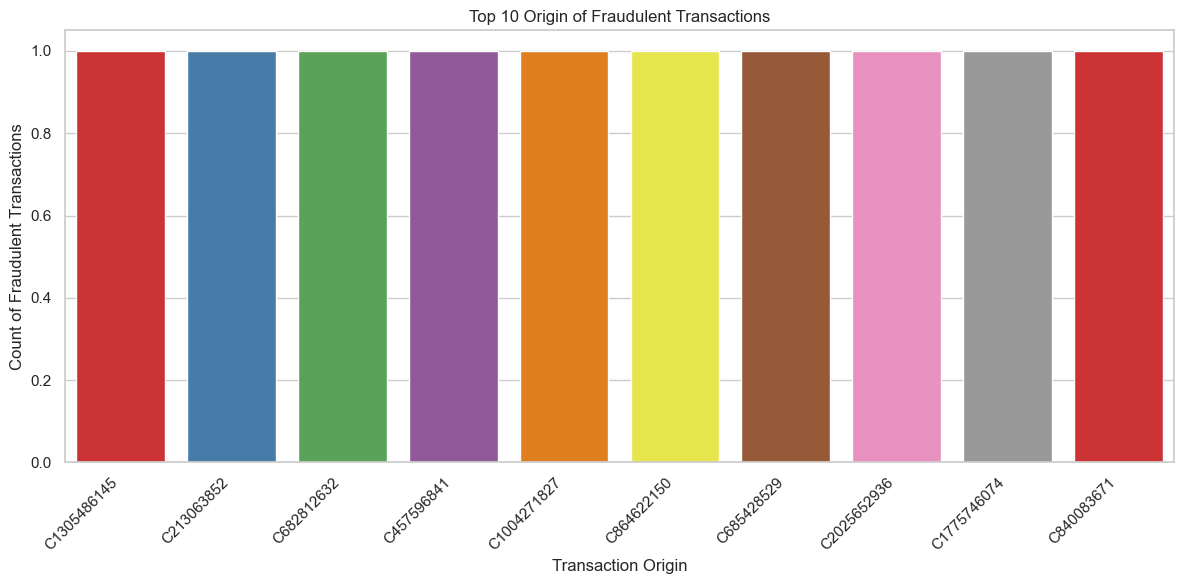

In [21]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes']

# Plot the graph to show the origin of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.countplot(data=fraudulent_transactions, x='nameOrig', order=fraudulent_transactions['nameOrig'].value_counts().index[:10], palette='Set1')
plt.title('Top 10 Origin of Fraudulent Transactions')
plt.xlabel('Transaction Origin')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

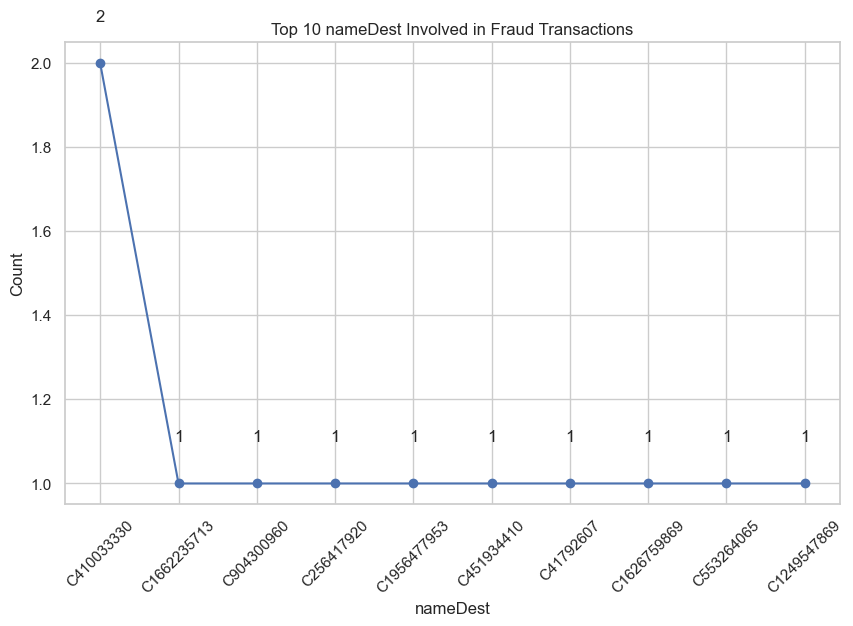

In [22]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes']

# Group the data by 'nameDest' and count the occurrences
name_dest_counts = fraudulent_transactions['nameDest'].value_counts().reset_index()

# Select the top 10 'nameDest'
top_10_name_dest = name_dest_counts.head(10)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(top_10_name_dest['index'], top_10_name_dest['nameDest'], marker='o')
plt.title('Top 10 nameDest Involved in Fraud Transactions')
plt.xlabel('nameDest')
plt.ylabel('Count')

# Add count labels
for i, count in enumerate(top_10_name_dest['nameDest']):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

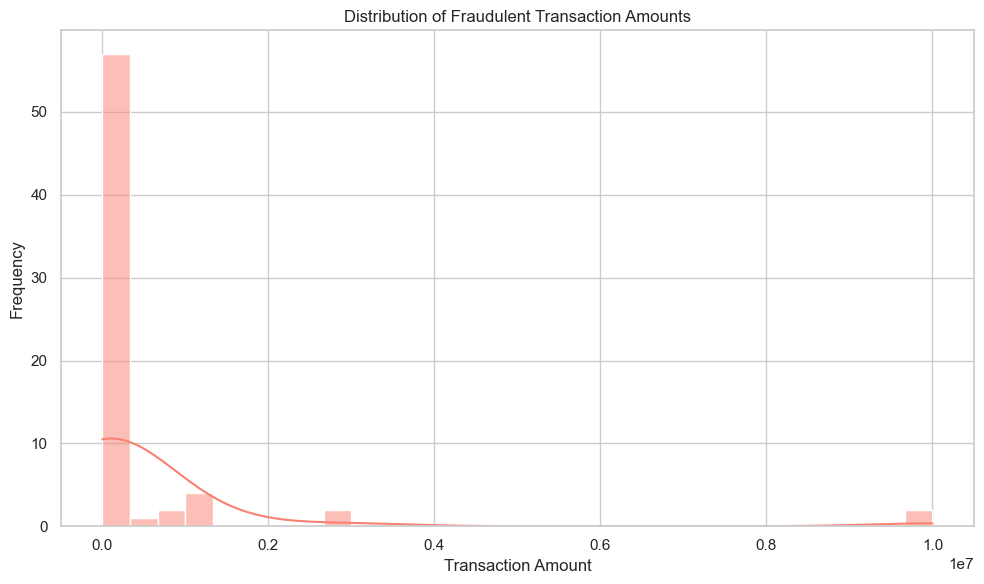

In [23]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes']

# Plot a histogram of transaction amounts for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=fraudulent_transactions, x='amount', bins=30, kde=True, color='salmon')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


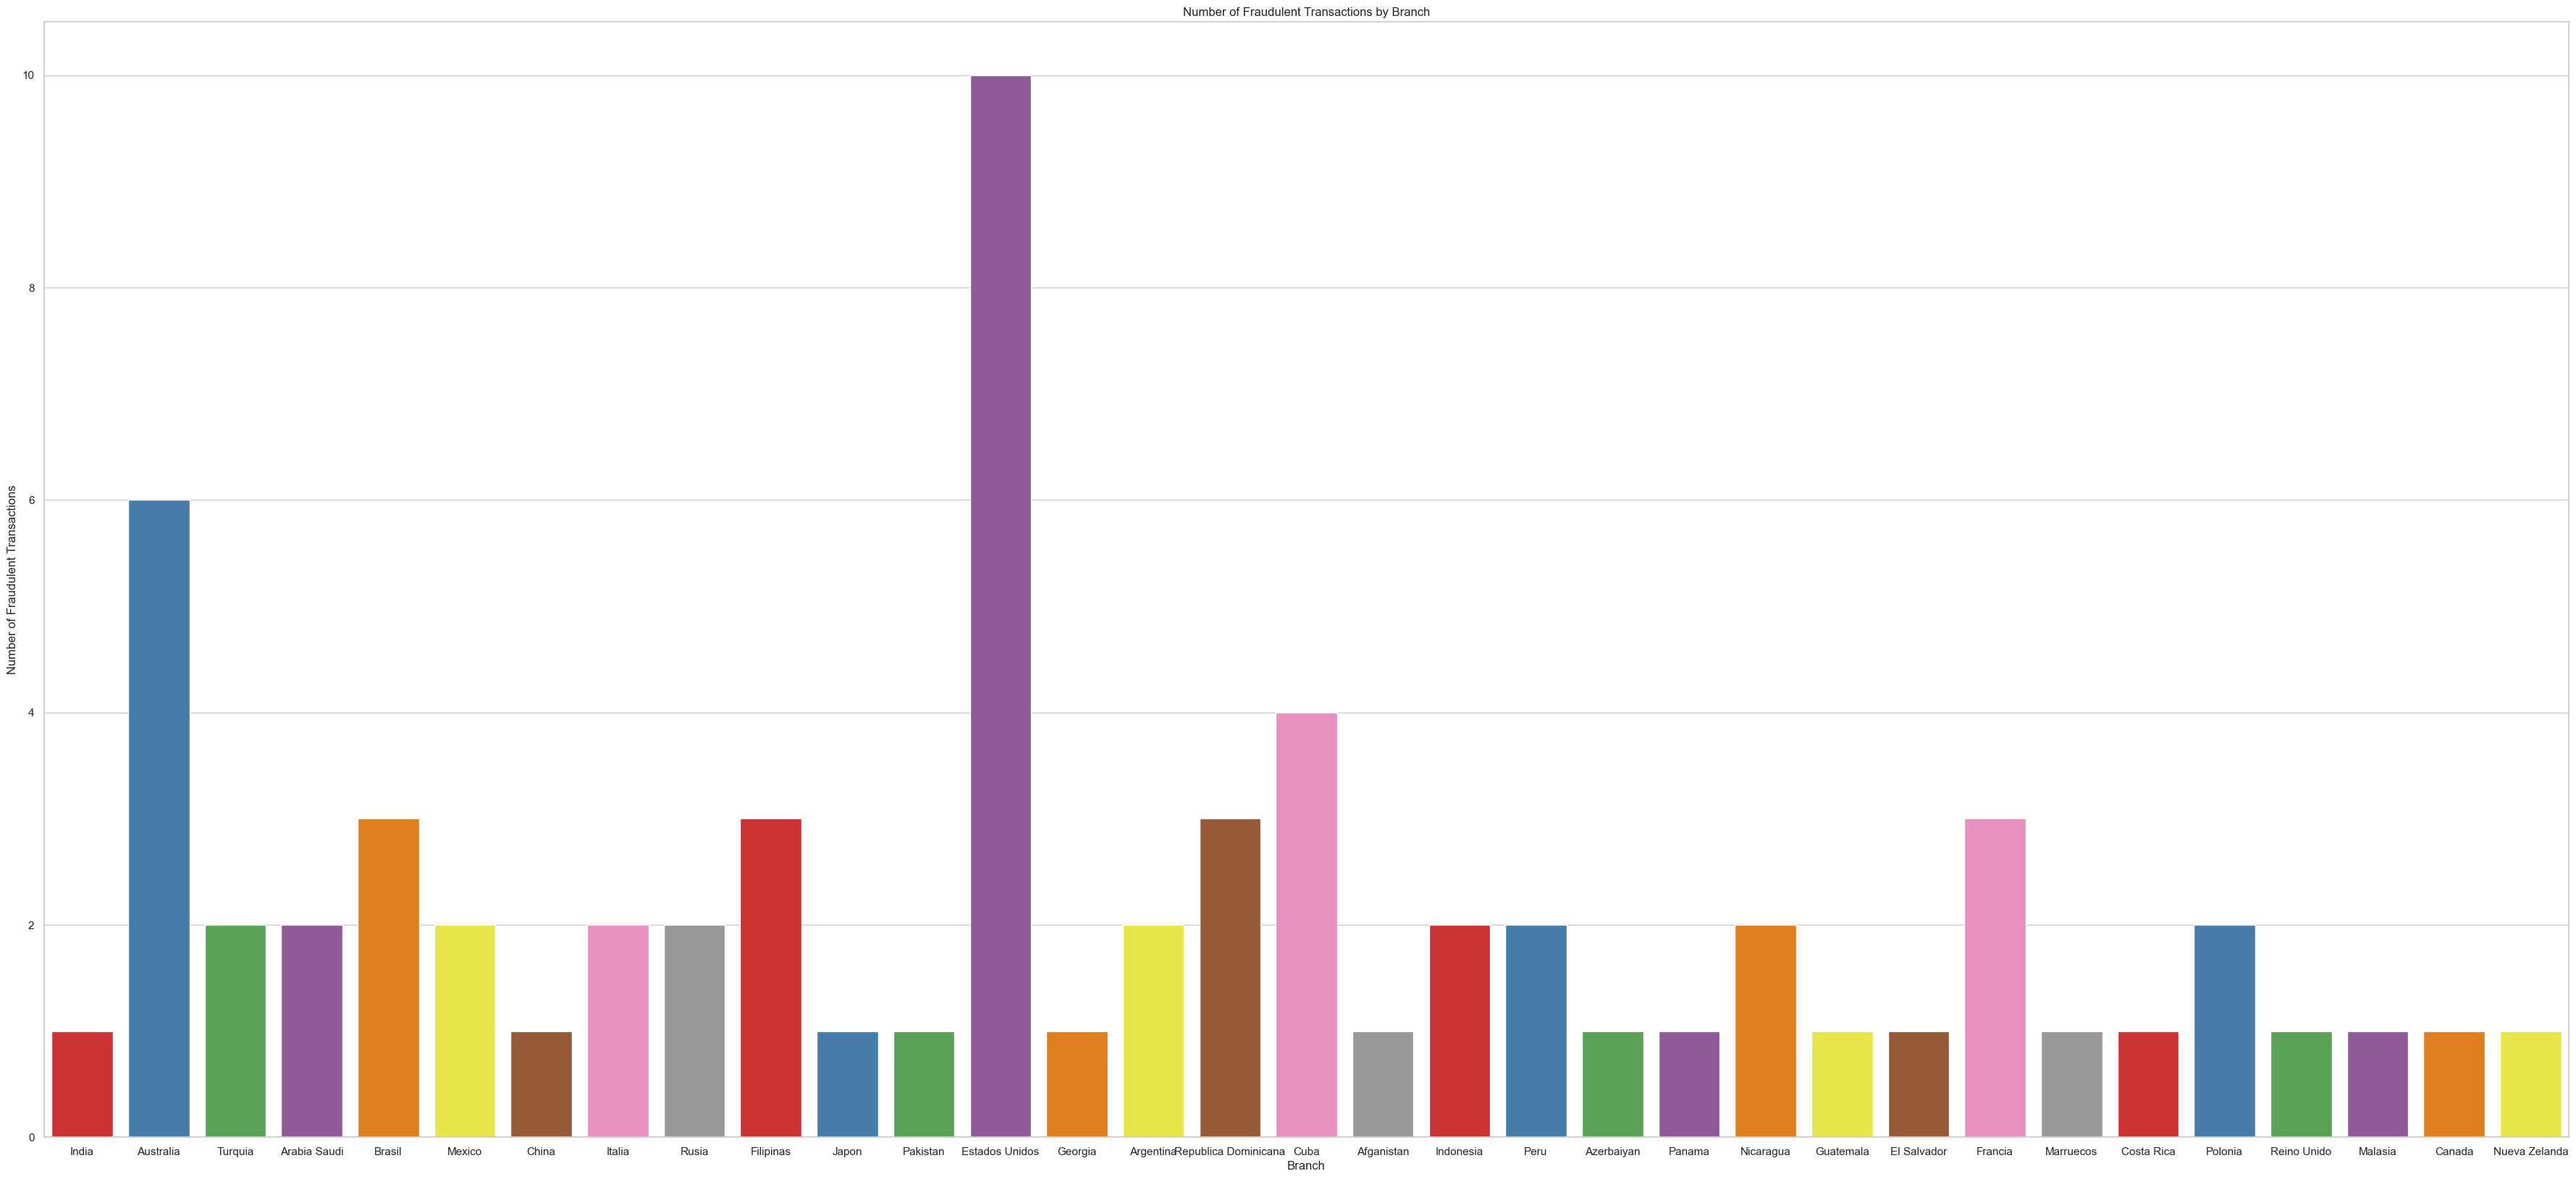

In [24]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes']

# Plot a count plot for fraudulent transactions by branch
plt.figure(figsize=(45, 20))
sns.countplot(x='branch', data=fraudulent_transactions, palette='Set1')
plt.title('Number of Fraudulent Transactions by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


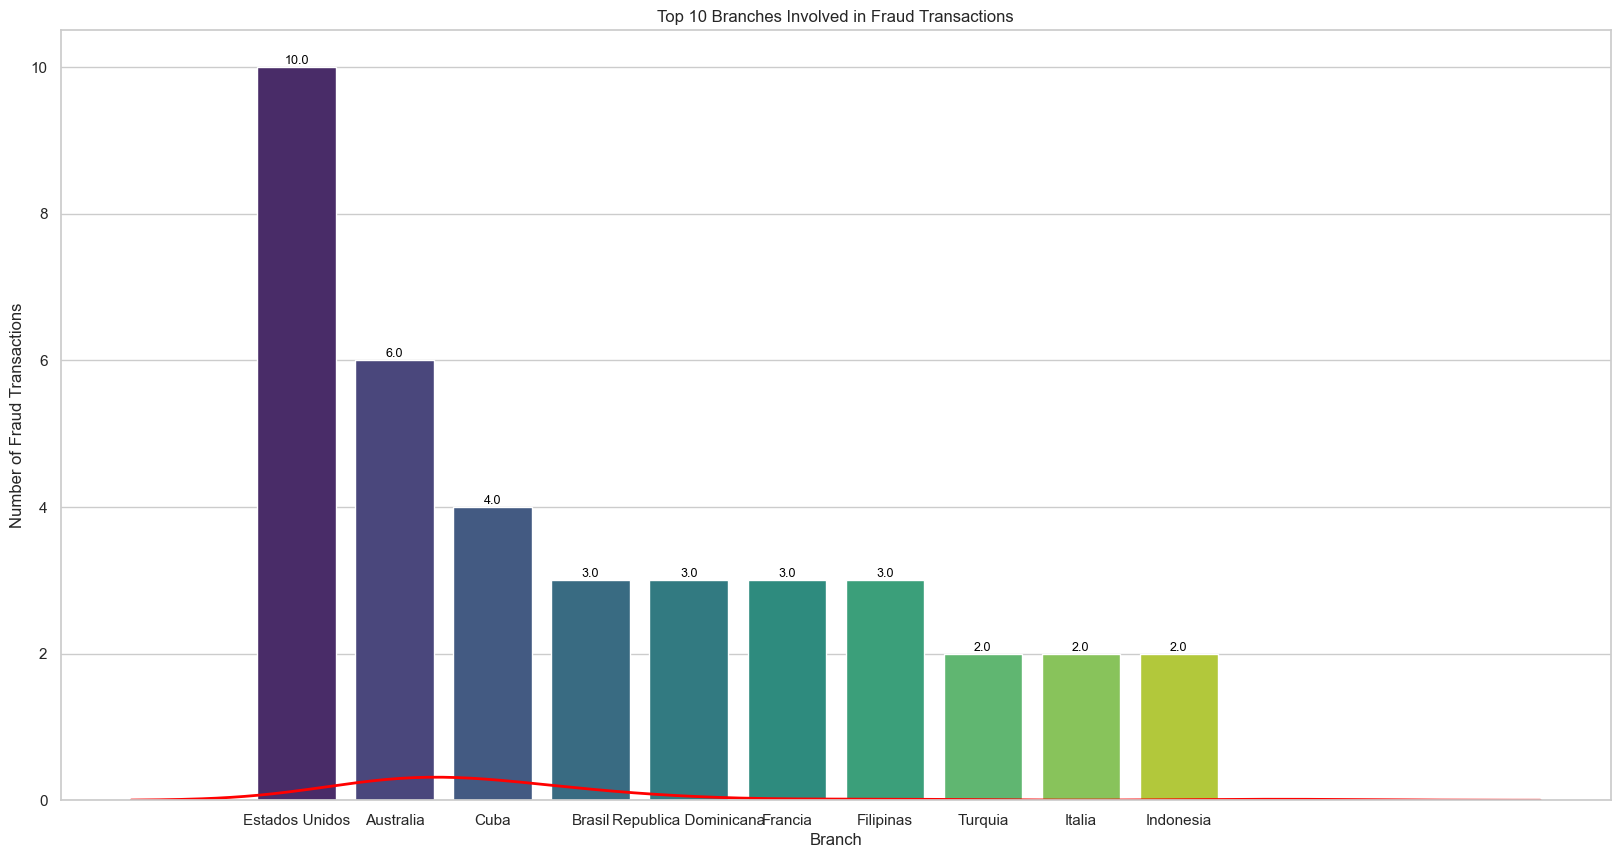

In [25]:
# Group the data by branch and count the number of fraud transactions for each branch
fraud_by_branch = clean_fd_modified[clean_fd_modified['isFraud'] == 'Yes'].groupby('branch').size().reset_index(name='fraud_count')
fraud_by_branch_sorted = fraud_by_branch.sort_values(by='fraud_count', ascending=False)
top_branches = fraud_by_branch_sorted.head(10)

# Plot a bar graph to visualize the number of fraud transactions for each of the top 3 branches
plt.figure(figsize=(20, 10))
bars = sns.barplot(x='branch', y='fraud_count', data=top_branches, palette='viridis')
plt.title('Top 10 Branches Involved in Fraud Transactions')
plt.xlabel('Branch')
plt.ylabel('Number of Fraud Transactions')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom', fontsize=9, color='black')
sns.kdeplot(data=fraud_by_branch['fraud_count'], color='red', linewidth=2)

plt.show()

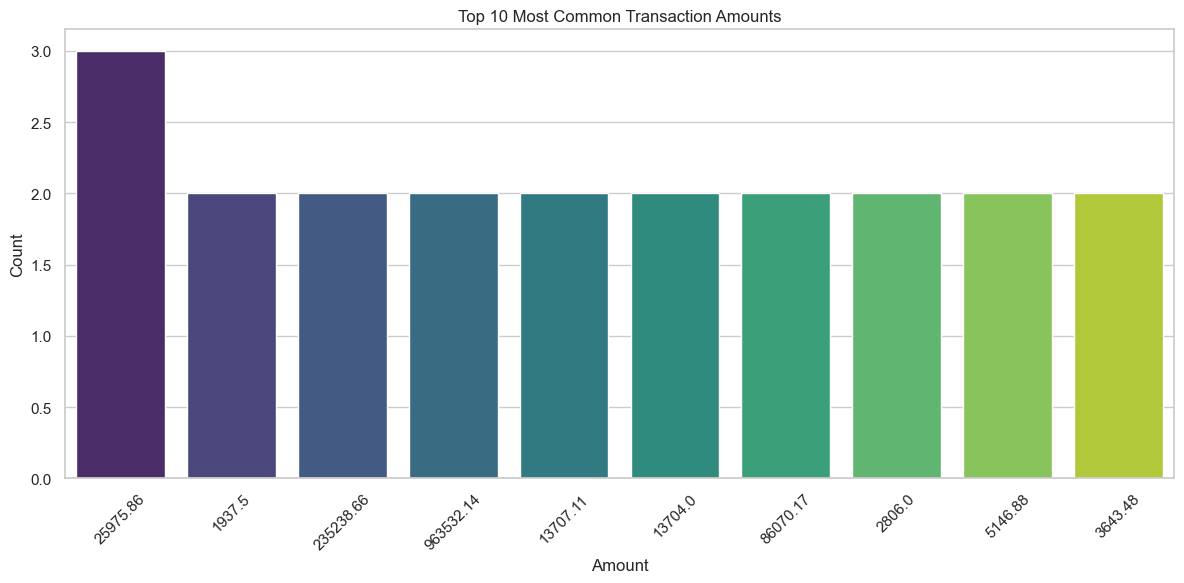

In [26]:
# Plot the most common amount transactions with count
plt.figure(figsize=(12, 6))
sns.countplot(x='amount', data=clean_fd_modified, order=clean_fd_modified['amount'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Most Common Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

# Modeling

# Creating Modeling dataset

In [27]:
clean_fd_modified.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,No,Current,3/1/2018,Morning,No
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,No,Savings,5/1/2018,Morning,No
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,No,Current,7/1/2018,Morning,Yes
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,No,Current,6/1/2018,Afternoon,Yes
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,No,Current,6/1/2018,Morning,No


In [28]:
# Converting isFraud & isFlaggedFraud catageroical to binary
mapping = {'No':0, 'Yes':1}

fraud_df = clean_fd_modified.copy()
fraud_df['isFraud'] = clean_fd_modified['isFraud'].map(mapping)
fraud_df['isFlaggedFraud'] = clean_fd_modified['isFlaggedFraud'].map(mapping)
fraud_df

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0
1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0
2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1
3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1
4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,PAYMENT,Cuba,337.50,C1494306005,33107.0,32769.50,M1424027000,0.0,0.0,7,0,Current,3/1/2018,Afternoon,0
10123,7,PAYMENT,Mexico,5003.57,C1633890169,32769.5,27765.93,M1854745805,0.0,0.0,11,0,Savings,5/1/2018,Morning,0
10124,7,PAYMENT,Panama,10424.89,C1026138669,50780.0,40355.11,M1852900317,0.0,0.0,6,0,Savings,7/1/2018,Night,0
10125,7,PAYMENT,Mexico,2823.59,C378659213,986.0,0.00,M301812950,0.0,0.0,12,0,Savings,6/1/2018,Night,0


In [29]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10088 non-null  int64  
 1   type                 10088 non-null  object 
 2   branch               10088 non-null  object 
 3   amount               10088 non-null  float64
 4   nameOrig             10088 non-null  object 
 5   oldbalanceOrg        10088 non-null  float64
 6   newbalanceOrig       10088 non-null  float64
 7   nameDest             10088 non-null  object 
 8   oldbalanceDest       10088 non-null  float64
 9   newbalanceDest       10088 non-null  float64
 10  unusuallogin         10088 non-null  int64  
 11  isFlaggedFraud       10088 non-null  int64  
 12  Acct type            10088 non-null  object 
 13  Date of transaction  10088 non-null  object 
 14  Time of day          10088 non-null  object 
 15  isFraud              10088 non-null 

In [30]:
# Drop nameOrig, nameDest
fraud_trans = fraud_df.drop(['branch', 'nameOrig', 'nameDest', 'Acct type', 'Date of transaction'], axis=1)
fraud_trans.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Time of day,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,9,0,Morning,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,10,0,Morning,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,2,0,Morning,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,Afternoon,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,17,0,Morning,0


In [31]:
# creating dummies 
fraud_trans = pd.get_dummies(fraud_trans, columns=['type', 'Time of day'], prefix=['type', 'Time of day'])
fraud_trans

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Time of day_Afternoon,Time of day_Morning,Time of day_Night
0,1,9839.64,170136.0,160296.36,0.0,0.0,9,0,0,0,0,0,1,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,10,0,0,0,0,0,1,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,2,0,1,0,0,0,0,1,0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,1,0,0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,17,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7,337.50,33107.0,32769.50,0.0,0.0,7,0,0,0,0,0,1,0,1,0,0
10123,7,5003.57,32769.5,27765.93,0.0,0.0,11,0,0,0,0,0,1,0,0,1,0
10124,7,10424.89,50780.0,40355.11,0.0,0.0,6,0,0,0,0,0,1,0,0,0,1
10125,7,2823.59,986.0,0.00,0.0,0.0,12,0,0,0,0,0,1,0,0,0,1


In [32]:
fraud_trans.isnull().sum()

step                     0
amount                   0
oldbalanceOrg            0
newbalanceOrig           0
oldbalanceDest           0
newbalanceDest           0
unusuallogin             0
isFlaggedFraud           0
isFraud                  0
type_CASH_IN             0
type_CASH_OUT            0
type_DEBIT               0
type_PAYMENT             0
type_TRANSFER            0
Time of day_Afternoon    0
Time of day_Morning      0
Time of day_Night        0
dtype: int64

In [33]:
fraud_trans[['isFraud']].value_counts()

isFraud
0          10020
1             68
dtype: int64

In [34]:
# Independent and dependent features
X = fraud_trans.drop('isFraud', axis=1)
y = fraud_trans.isFraud

# Without imbalanced dataset

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [37]:
lgr = LogisticRegression(random_state=16)

# fit the model with data
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

In [38]:
y_test.value_counts()

0    3011
1      16
Name: isFraud, dtype: int64

In [39]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3010    1]
 [  11    5]]
0.9960356788899901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3011
           1       0.83      0.31      0.45        16

    accuracy                           1.00      3027
   macro avg       0.91      0.66      0.73      3027
weighted avg       1.00      1.00      1.00      3027



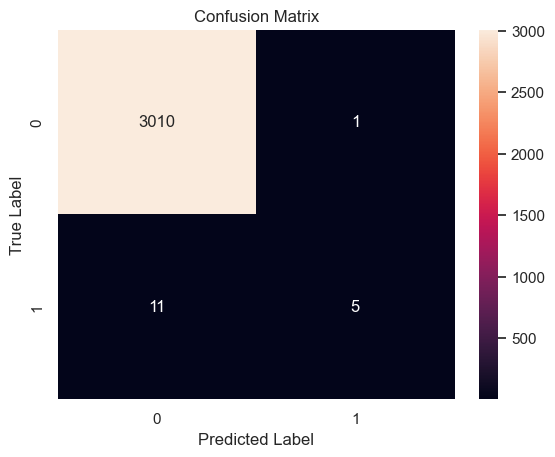

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=16)

# fit the model with data
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [42]:
y_test.value_counts()

0    3011
1      16
Name: isFraud, dtype: int64

In [43]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3011    0]
 [   7    9]]
0.9976874793524942
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3011
           1       1.00      0.56      0.72        16

    accuracy                           1.00      3027
   macro avg       1.00      0.78      0.86      3027
weighted avg       1.00      1.00      1.00      3027



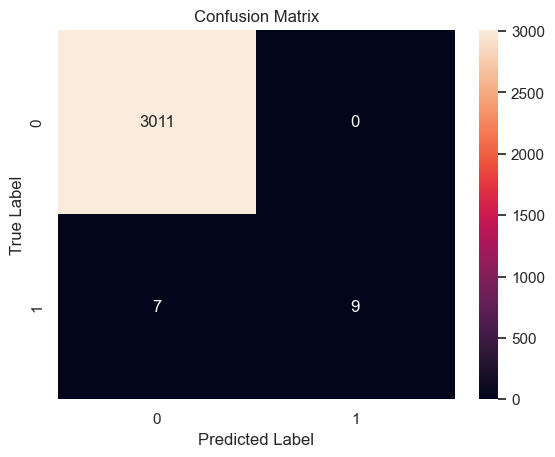

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Using HyperParameters

In [45]:
lgr = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2', 'elasticent', 'none'], 'C': np.logspace(-1,1), 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter':[50, 100, 150]}]

clf = GridSearchCV(lgr, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

# fit the model with data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


c:\Users\pruth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4050 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.

In [46]:
y_test.value_counts()

0    3011
1      16
Name: isFraud, dtype: int64

In [47]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3006    5]
 [  10    6]]
0.9950445986124876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3011
           1       0.55      0.38      0.44        16

    accuracy                           1.00      3027
   macro avg       0.77      0.69      0.72      3027
weighted avg       0.99      1.00      0.99      3027



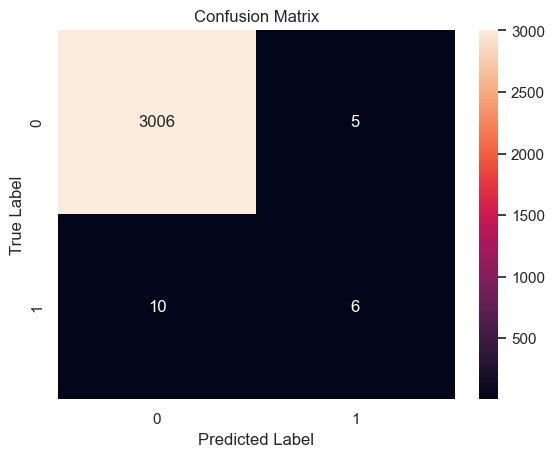

In [48]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
rfc = RandomForestClassifier()
grid_param = {
    'n_estimators': [50,100,150,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,1),
    'max_features': ['auto', 'log2']
}
grid_search = GridSearchCV(rfc, param_grid=grid_param, cv=3, n_jobs=-1, verbose=3)
# fit the model with data
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\Users\pruth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
238 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\pruth\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\pruth\anaconda3\lib\site-packag

In [50]:
y_test.value_counts()

0    3011
1      16
Name: isFraud, dtype: int64

In [51]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3011    0]
 [   8    8]]
0.9973571192599934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3011
           1       1.00      0.50      0.67        16

    accuracy                           1.00      3027
   macro avg       1.00      0.75      0.83      3027
weighted avg       1.00      1.00      1.00      3027



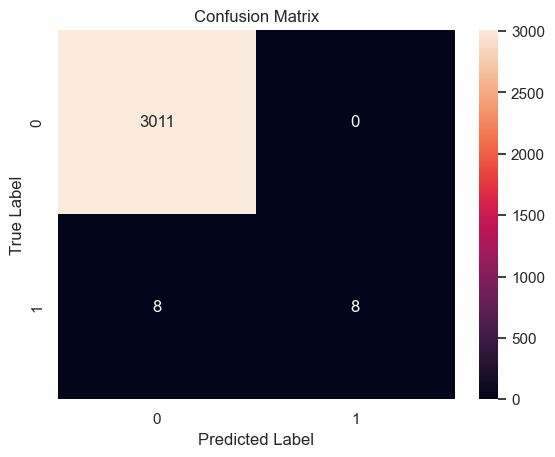

In [52]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Undersampling 

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Independent and dependent features
X = fraud_trans.drop('isFraud', axis=1)
y = fraud_trans.isFraud

# Undersample
us = RandomUnderSampler()
X_resampled, y_resampled = us.fit_resample(X, y)

y_resampled.value_counts()

0    68
1    68
Name: isFraud, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7)

In [55]:
lgr = LogisticRegression(random_state=16)

# fit the model with data
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

In [56]:
y_test.value_counts()

0    23
1    18
Name: isFraud, dtype: int64

In [57]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  2]
 [ 4 14]]
0.8536585365853658
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.88      0.78      0.82        18

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41



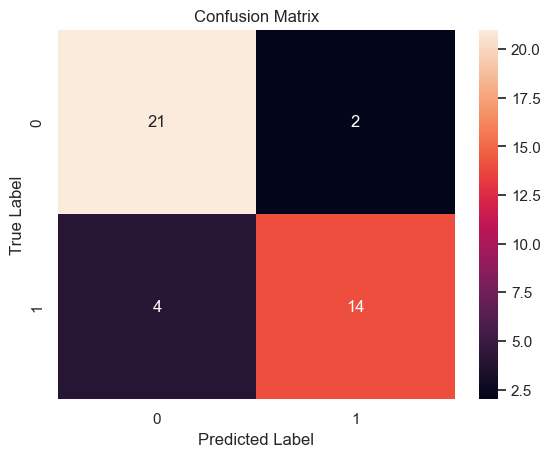

In [58]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=16)

# fit the model with data
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [60]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  1]
 [ 1 17]]
0.9512195121951219
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        18

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



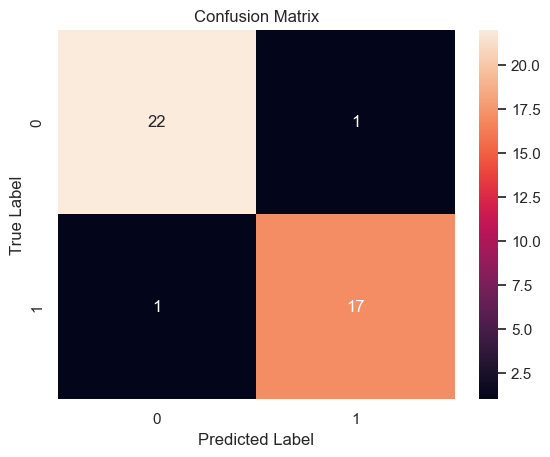

In [61]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Oversampling

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
# Independent and dependent features
X = fraud_trans.drop('isFraud', axis=1)
y = fraud_trans.isFraud

ovs = RandomOverSampler()
X_resampled, y_resampled = ovs.fit_resample(X, y)

In [94]:
y_resampled.value_counts()

0    10020
1    10020
Name: isFraud, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.7)

In [96]:
y_test.value_counts()

0    7016
1    7012
Name: isFraud, dtype: int64

In [104]:
lgr = LogisticRegression(random_state=16)

# fit the model with data
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

In [98]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6357  659]
 [ 220 6792]]
0.9373396065012831
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7016
           1       0.91      0.97      0.94      7012

    accuracy                           0.94     14028
   macro avg       0.94      0.94      0.94     14028
weighted avg       0.94      0.94      0.94     14028



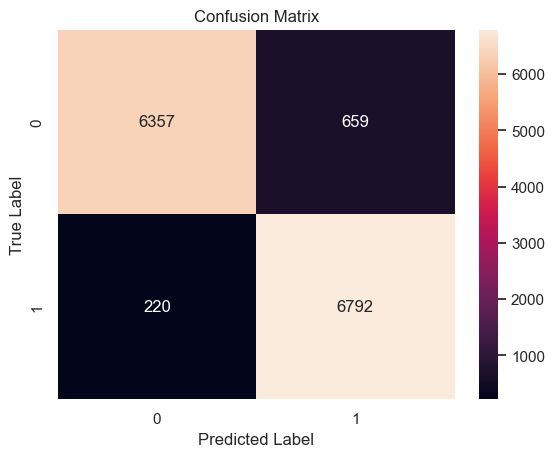

In [99]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=16)

# fit the model with data
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [101]:
y_test.value_counts()

0    7016
1    7012
Name: isFraud, dtype: int64

In [102]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7012    4]
 [   0 7012]]
0.9997148560022812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7016
           1       1.00      1.00      1.00      7012

    accuracy                           1.00     14028
   macro avg       1.00      1.00      1.00     14028
weighted avg       1.00      1.00      1.00     14028



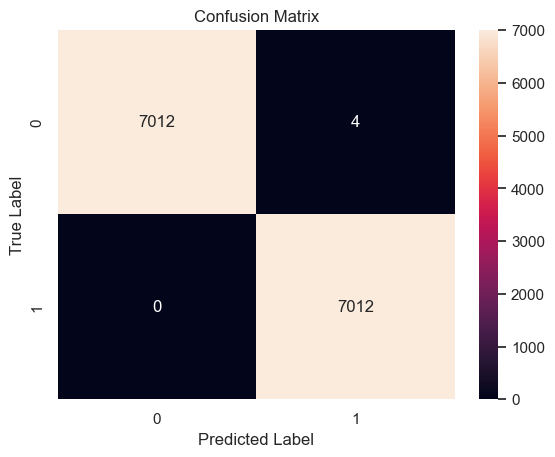

In [103]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()